# Fundamentals of Machine Learning - Exercise 9
Goal of this excercise is to complete the hands-on experience of the classification task.

## Household Prices Dataset
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

* ... I bet that you already know the data pretty well 😅

![meme03](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_03.jpg?raw=true)

**Important attributes description:**
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder

# 🎯 Our goal is to predict if the house will be sold for more than 250k USD or not
* We will use categorized price as a **Target** variable

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv', sep=',')
df = df.loc[:, ['SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']]
df.loc[:, ['Target']] = (df.SalePrice > 250000).astype(int)
df = df.drop(['SalePrice'], axis=1)

In [3]:
df.head()

,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Target
0,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,0
1,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,0
2,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,0
3,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,0
4,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,0


# Take a look at the features
* We will need it to answer the questions

In [4]:
df.describe()

,MSSubClass,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,Target
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,1971.267808,1515.463699,2.866438,0.148630
std,42.300571,1.382997,1.112799,30.202904,525.480383,0.815778,0.355845
min,20.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,20.000000,5.000000,5.000000,1954.000000,1129.500000,2.000000,0.000000
50%,50.000000,6.000000,5.000000,1973.000000,1464.000000,3.000000,0.000000
75%,70.000000,7.000000,6.000000,2000.000000,1776.750000,3.000000,0.000000
max,190.000000,10.000000,9.000000,2010.000000,5642.000000,8.000000,1.000000


## Categorial features EDA

In [5]:
df.describe(exclude=np.number)

,BldgType,HouseStyle,Heating,CentralAir
count,1460,1460,1460,1460
unique,5,8,6,2
top,1Fam,1Story,GasA,Y
freq,1220,726,1428,1365


### BldgType

In [6]:
df.BldgType.value_counts()

,count
BldgType,
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


### HouseStyle

In [7]:
df.HouseStyle.value_counts()

,count
HouseStyle,
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
1.5Unf,14
2.5Unf,11
2.5Fin,8


### Heating

In [8]:
df.Heating.value_counts()

,count
Heating,
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


## Missing values

In [9]:
df.isna().sum()

,0
MSSubClass,0
BldgType,0
HouseStyle,0
OverallQual,0
OverallCond,0
YearBuilt,0
Heating,0
CentralAir,0
GrLivArea,0
BedroomAbvGr,0


## Labels distribution

In [10]:
df.Target.value_counts()

,count
Target,
0,1243
1,217


# ✅ Task (2p)
Complete the following tasks:

1. 📈 Describe what operations you are performing for each of the features
    * Mainly focus on categorical features
      
2. 📌 Answer the following questions:
    * **How many values are missing?**
    * **How many instances do you have in each of the classes?**
    * 🔎 **Which metric score do you propose for the classification model performance evaluation?**
        * 💡 This depends on your previous answer
          
3. ⚡Finish your preprocessing pipeline and split the data into the Input and Output part (i.e. `X` and `y` variables)

4. 🌳 Start with the **Decision Tree**
    * Use 5-fold cross validation
    * 🔎 Will you use *standard* cross validation or *stratified* cross validation?
    * Compute mean of the obtained score values
      
5. 🚀 Select one other algorithm from https://scikit-learn.org/stable/supervised_learning.html
    * Repeat the 5-fold CV
      
6. 📒 **Write down which default model is better**

7. 📊 Experiment with hyper-parameters
    * Select at least one important parameter for the model
    * Set the parameter value range
        * You can use random values, interval of values, ...
    * Do the 5-fold CV
        * Compute mean of the obtained score values
    * Document the experiment results using tables and/or plots
    * Describe the results in a Markdown cell

8. 📒 **Write down which model (default or tuned) is the best and why**

* **Document everything you do in a Markdown cells**
    * ❌ Results interpretation figured in real-time during task check is not allowed! ❌

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_01.jpg?raw=true)

## Preprocessing Pipeline



In [15]:
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(exclude='object').columns.drop('Target')

print(f"Categorical features: {list(categorical_features)}")
print(f"Numerical features: {list(numerical_features)}")

Categorical features: ['BldgType', 'HouseStyle', 'Heating', 'CentralAir']
Numerical features: ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'BedroomAbvGr']


In [13]:
# Apply one-hot encoding to categorical features
X = pd.get_dummies(df.drop('Target', axis=1), columns=categorical_features, drop_first=True)
y = df['Target']

print("Shape of X after one-hot encoding:", X.shape)
print("Shape of y:", y.shape)

display(X.head())
display(y.head())

Shape of X after one-hot encoding: (1460, 23)
Shape of y: (1460,)


,MSSubClass,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,...,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y
0,60,7,5,2003,1710,3,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
1,20,6,8,1976,1262,3,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,60,7,5,2001,1786,3,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
3,70,7,5,1915,1717,3,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
4,60,8,5,2000,2198,4,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True


,Target
0,0
1,0
2,0
3,0
4,0


In [19]:
# Rozhodovací strom
dt_model = DecisionTreeClassifier(random_state=42)

# Nastavení K-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []
accuracy_scores = []

print("5-fold Stratified Cross-Validation pro rozhodovací strom...")

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Trénování
    dt_model.fit(X_train, y_train)

    # Vytvoření predikce
    y_pred = dt_model.predict(X_test)

    # Výpočet metriky
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    f1_scores.append(f1)
    accuracy_scores.append(acc)

    print(f"Fold {fold + 1}: F1-Score = {f1:.4f}, Accuracy = {acc:.4f}")

# Compute mean scores
mean_f1_score_dt = np.mean(f1_scores)
mean_accuracy_score_dt = np.mean(accuracy_scores)

print(f"\nMean F1-Score: {mean_f1_score_dt:.4f}")
print(f"Mean Accuracy: {mean_accuracy_score_dt:.4f}")

5-fold Stratified Cross-Validation pro rozhodovací strom...
Fold 1: F1-Score = 0.6522, Accuracy = 0.8904
Fold 2: F1-Score = 0.7529, Accuracy = 0.9281
Fold 3: F1-Score = 0.6591, Accuracy = 0.8973
Fold 4: F1-Score = 0.7160, Accuracy = 0.9212
Fold 5: F1-Score = 0.7416, Accuracy = 0.9212

Mean F1-Score: 0.7044
Mean Accuracy: 0.9116


<Axes: >

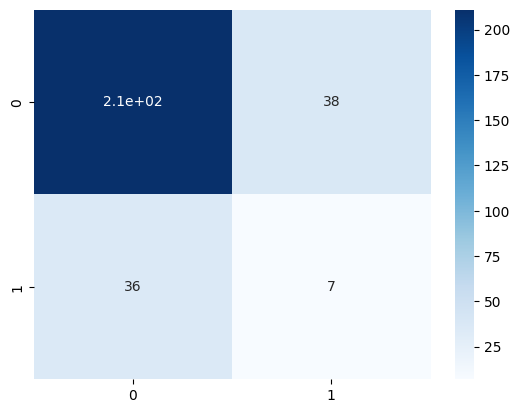

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [28]:
#Další: RandomForest
clf_rf = RandomForestClassifier(random_state=42)
skf = KFold(n_splits=5)
scores_rf = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    scores_rf.append(f1_score(y_test, y_pred))

mean_f1_rf = np.mean(scores_rf)
print(f"Mean F1-score for default RandomForestClassifier: {mean_f1_rf:.4f}")

Mean F1-score for default RandomForestClassifier: 0.7578


In [29]:
scores_global_rf = []
for n_est in np.arange(10, 201, 10):
    skf = KFold(n_splits=5)
    scores_current_n_estimators = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf_rf = RandomForestClassifier(n_estimators=n_est, random_state=13)
        clf_rf.fit(X_train, y_train)
        y_pred_rf = clf_rf.predict(X_test)
        scores_current_n_estimators.append(f1_score(y_test, y_pred_rf))
    scores_global_rf.append((n_est, np.mean(scores_current_n_estimators)))

df_rf_tuning = pd.DataFrame.from_records(scores_global_rf, columns=['n_estimators', 'f1'])
df_rf_tuning.head()

,n_estimators,f1
0,10,0.722556
1,20,0.751451
2,30,0.738409
3,40,0.763276
4,50,0.757813


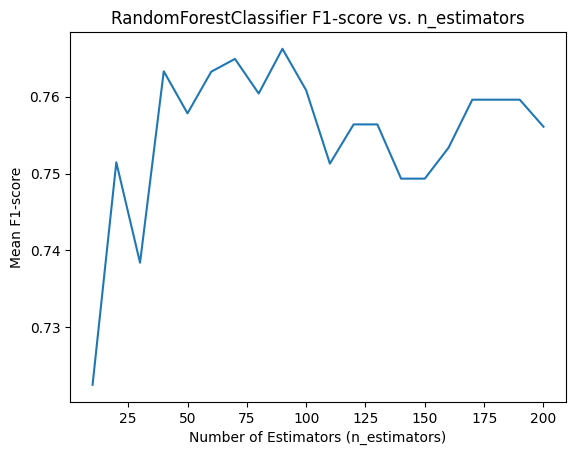

In [30]:
sns.lineplot(data=df_rf_tuning, x='n_estimators', y='f1')
plt.title('RandomForestClassifier F1-score vs. n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean F1-score')
plt.show()

In [31]:
best_n_estimators = df_rf_tuning.sort_values(by='f1', ascending=False).iloc[0]
print(f"Optimal n_estimators: {int(best_n_estimators['n_estimators'])}")
print(f"Best F1-score: {best_n_estimators['f1']:.4f}")

Optimal n_estimators: 90
Best F1-score: 0.7662
